In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Data/black_box_2_data.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Job tenure                       7430 non-null   int64  
 1   Age                              7430 non-null   int64  
 2   Car price                        7430 non-null   int64  
 3   Funding amount                   7430 non-null   int64  
 4   Down payment                     7430 non-null   int64  
 5   Loan duration                    7430 non-null   int64  
 6   Monthly payment                  7430 non-null   float64
 7   Credit event                     7430 non-null   int64  
 8   Married                          7430 non-null   int64  
 9   Homeowner                        7430 non-null   int64  
 10  Monthly payment to income ratio  7430 non-null   float64
 11  Loan to car price ratio          7430 non-null   float64
 12  Job tenure * Age    

In [63]:
X = df.drop(columns=["Default (y)", "Pred_default (y_hat)", "PD", "Group"])
y = df["Default (y)"]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
from sklearn.metrics import (
    balanced_accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

## Logistic Regression

Balanced accuracy:  0.5841864113520968
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1189
           1       0.64      0.20      0.30       297

    accuracy                           0.82      1486
   macro avg       0.74      0.58      0.60      1486
weighted avg       0.79      0.82      0.78      1486

ROC AUC:  0.7834781796093823


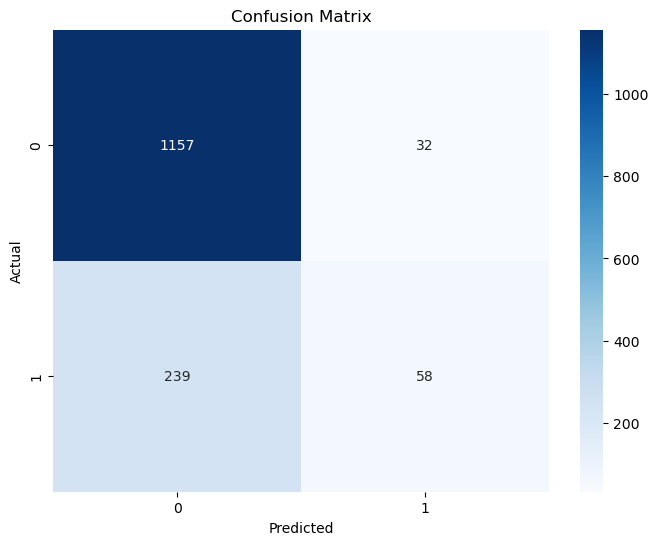

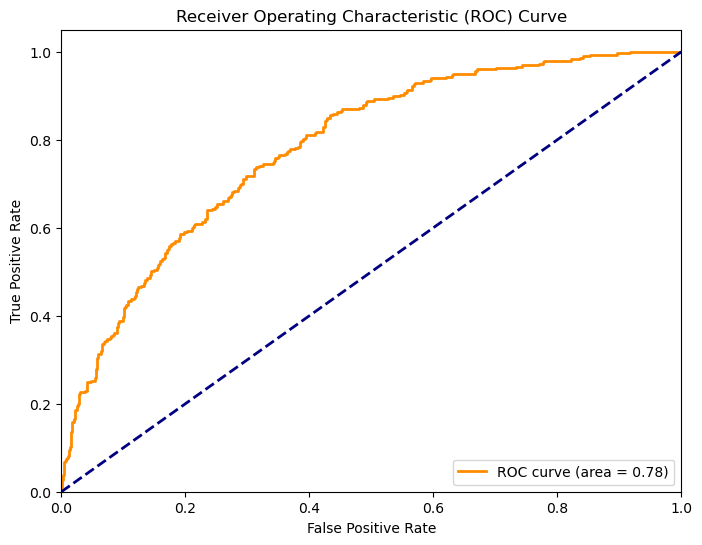

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## Decision Tree

Balanced accuracy:  0.5981329980488937
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1189
           1       0.35      0.36      0.36       297

    accuracy                           0.74      1486
   macro avg       0.60      0.60      0.60      1486
weighted avg       0.74      0.74      0.74      1486

ROC AUC:  0.5981329980488937


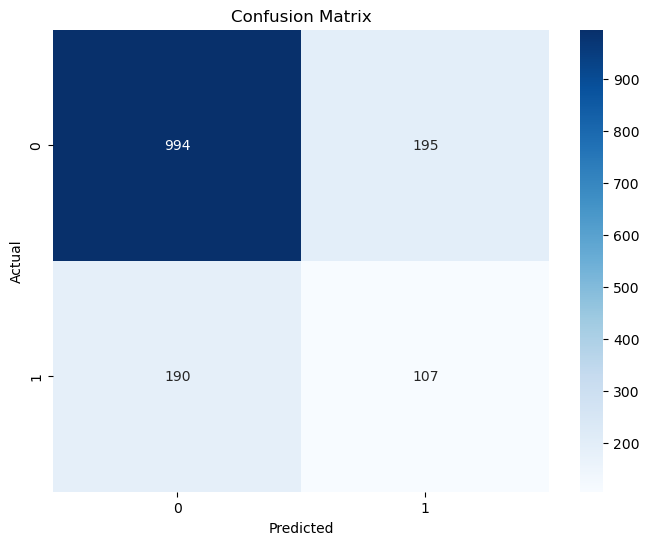

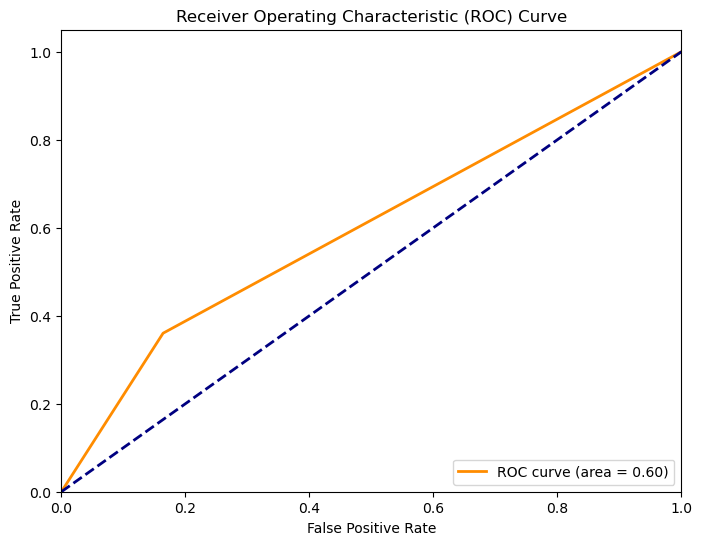

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## Random Forest

Balanced accuracy:  0.5963985240688352
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1189
           1       0.58      0.24      0.33       297

    accuracy                           0.81      1486
   macro avg       0.71      0.60      0.61      1486
weighted avg       0.78      0.81      0.78      1486

ROC AUC:  0.7823454619081197


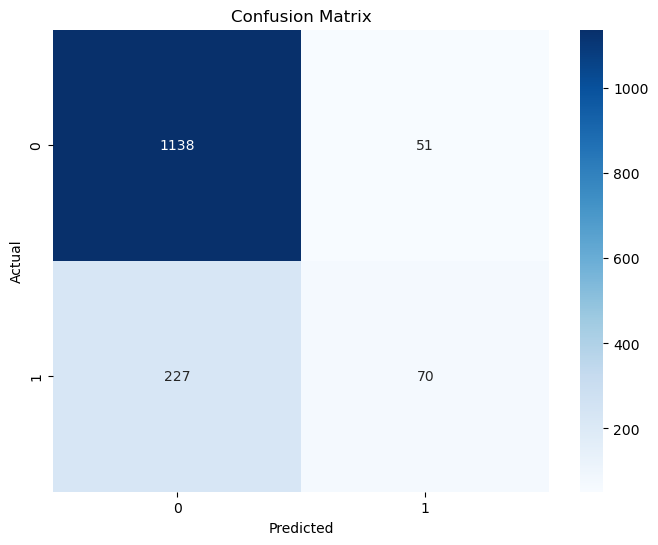

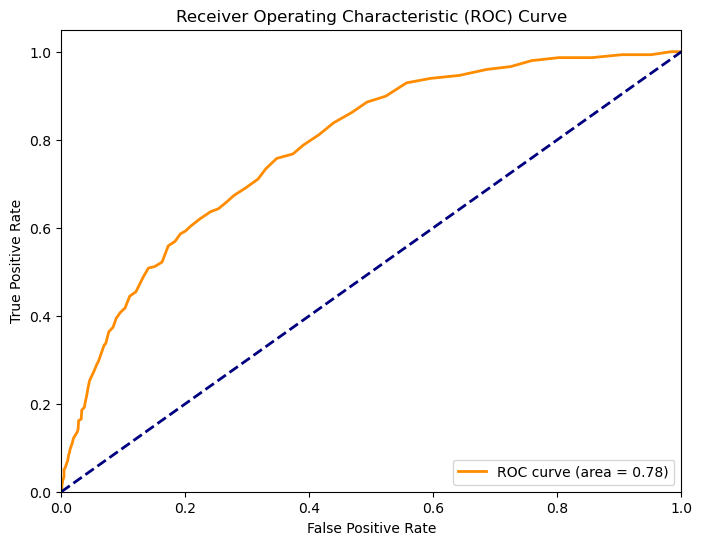

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Machines

Balanced accuracy:  0.6102913066748222
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1189
           1       0.57      0.27      0.37       297

    accuracy                           0.81      1486
   macro avg       0.70      0.61      0.63      1486
weighted avg       0.78      0.81      0.79      1486

ROC AUC:  0.7799681706325945


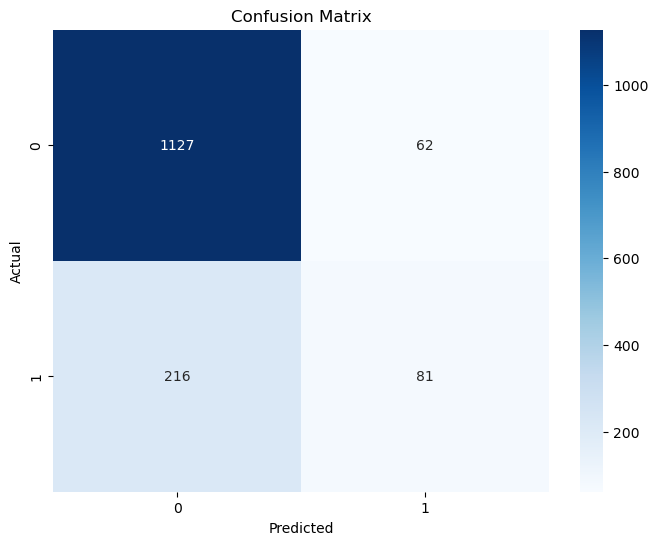

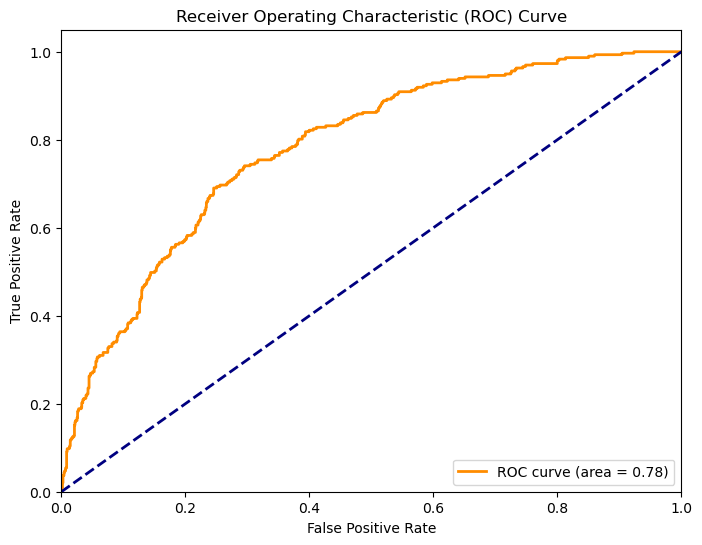

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

Balanced accuracy:  0.5572447208275636
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1189
           1       0.70      0.13      0.22       297

    accuracy                           0.81      1486
   macro avg       0.76      0.56      0.56      1486
weighted avg       0.80      0.81      0.76      1486

ROC AUC:  0.7209493307054282


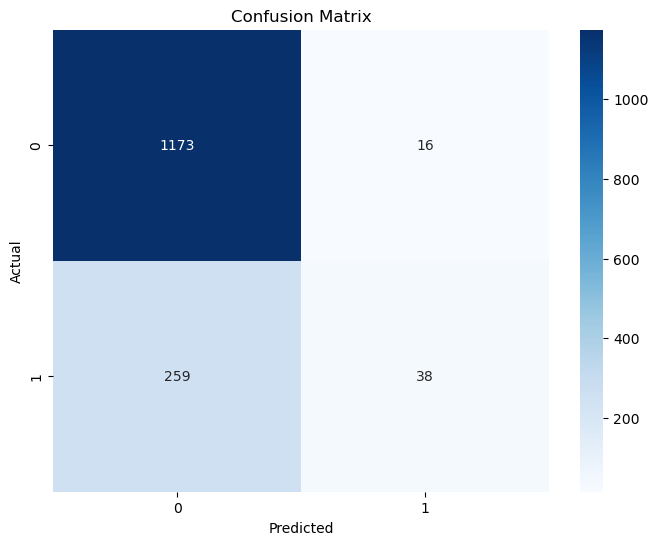

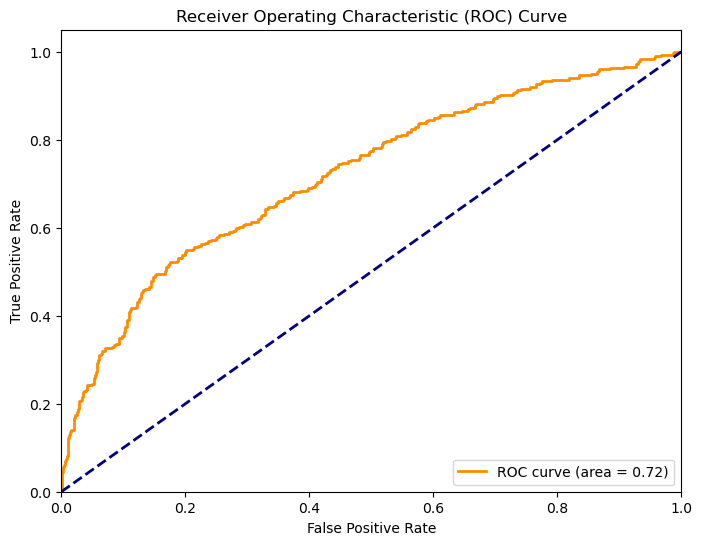

In [25]:
from sklearn.svm import SVC

model = SVC(probability=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## XGBoost

Balanced accuracy:  0.6090368218206739
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1189
           1       0.50      0.29      0.37       297

    accuracy                           0.80      1486
   macro avg       0.67      0.61      0.62      1486
weighted avg       0.77      0.80      0.78      1486

ROC AUC:  0.7583176876700846


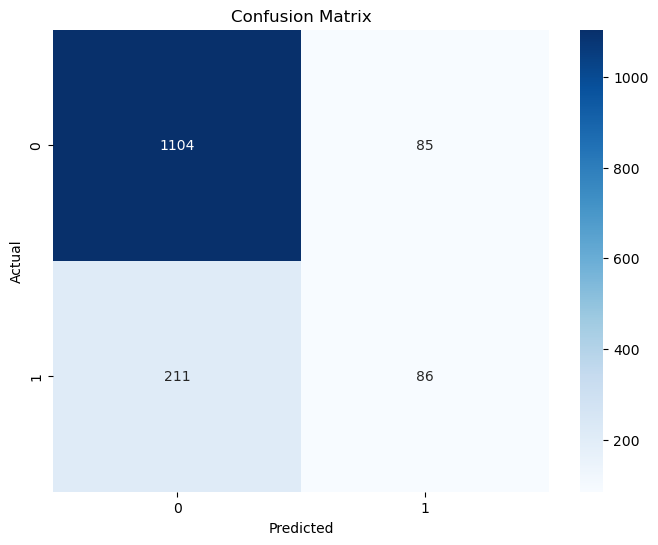

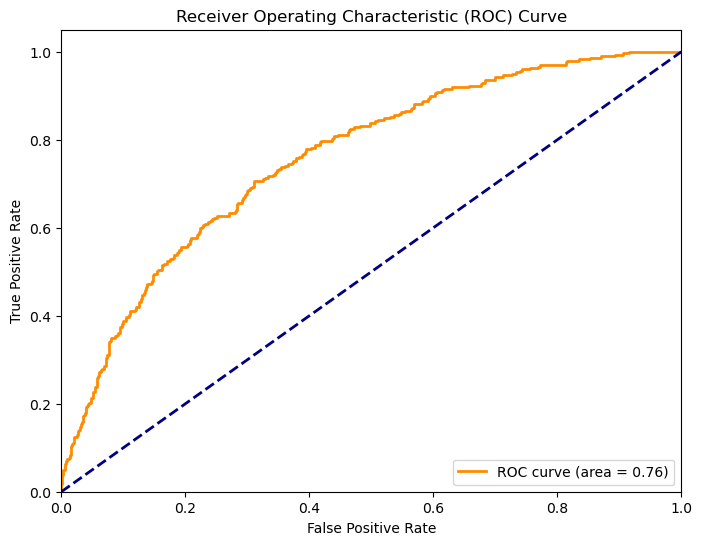

In [27]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")


NameError: name 'X_train' is not defined

In [35]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    make_scorer,
    f1_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import warnings

warnings.filterwarnings("ignore")

In [37]:
model = MLPClassifier(max_iter=1000)


In [38]:
scaler = RobustScaler()
undersampler = RandomUnderSampler(random_state=0, sampling_strategy={0: 3715})
oversampler = SMOTE(random_state=0)

In [39]:
pipeline = Pipeline(
    [
        ("scaler", scaler),
        ("undersampler", undersampler),
        ("oversampler", oversampler),
        ("model", MLPClassifier(max_iter=1000)),
    ]
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Balanced accuracy:  0.6676167336386007
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1189
           1       0.37      0.59      0.45       297

    accuracy                           0.71      1486
   macro avg       0.62      0.67      0.63      1486
weighted avg       0.78      0.71      0.73      1486

ROC AUC:  0.7366148165138915


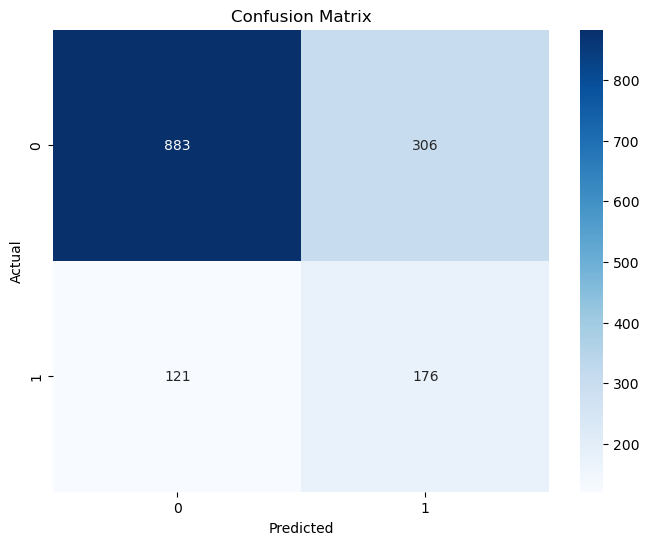

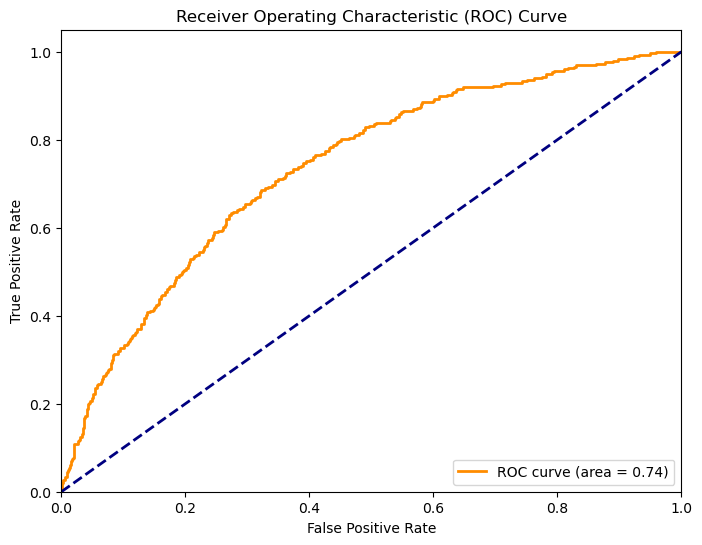

In [41]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]


print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [42]:
def objective(trial):
    # Hyperparameter search space for MLPClassifier
    hidden_layer_sizes = trial.suggest_categorical(
        "hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 100)]
    )
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)

    # Sampling strategies for under/over sampling (tune the ratio for both)
    undersample_strategy = trial.suggest_int(
        "undersample_strategy", 3000, 4000
    )  # Number of majority class samples after undersampling
    oversample_strategy = trial.suggest_float(
        "oversample_strategy", 0.5, 1.0
    )  # Oversample minority class to at least 50-100% of the majority class

    # Define the pipeline
    pipeline = Pipeline(
        [
            ("scaler", RobustScaler()),
            (
                "undersampler",
                RandomUnderSampler(
                    random_state=0, sampling_strategy={0: undersample_strategy}
                ),
            ),
            (
                "oversampler",
                SMOTE(random_state=0, sampling_strategy=oversample_strategy),
            ),
            (
                "model",
                MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    alpha=alpha,
                    learning_rate_init=learning_rate_init,
                    max_iter=1000,
                    random_state=0,
                ),
            ),
        ]
    )

    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross-validation and evaluate using F1-score (or AUC, etc.)
    scores = cross_val_score(
        pipeline, X, y, cv=cv, scoring=make_scorer(f1_score, average="macro")
    )

    # Return the mean score across folds
    return scores.mean()


In [43]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)


[I 2024-09-26 18:10:21,954] A new study created in memory with name: no-name-903a4c27-8791-4e99-9974-c1db256cf16f
[I 2024-09-26 18:10:47,960] Trial 0 finished with value: 0.671707680108206 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.00054307918497587, 'learning_rate_init': 0.0002908544814178136, 'undersample_strategy': 3123, 'oversample_strategy': 0.6027992657668315}. Best is trial 0 with value: 0.671707680108206.
[I 2024-09-26 18:11:05,896] Trial 1 finished with value: 0.6703823769303449 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'alpha': 1.716585584150734e-05, 'learning_rate_init': 0.00011513326335664961, 'undersample_strategy': 3401, 'oversample_strategy': 0.6671999497842105}. Best is trial 0 with value: 0.671707680108206.
[I 2024-09-26 18:11:16,424] Trial 2 finished with value: 0.6414560457786659 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'alpha': 0.07845411731434179, 'learning_rate_init': 0.0073

In [44]:
best_params = study.best_params

pipeline = Pipeline(
    [
        ("scaler", RobustScaler()),
        (
            "undersampler",
            RandomUnderSampler(
                random_state=0,
                sampling_strategy={0: best_params["undersample_strategy"]},
            ),
        ),
        (
            "oversampler",
            SMOTE(random_state=0, sampling_strategy=best_params["oversample_strategy"]),
        ),
        (
            "model",
            MLPClassifier(
                hidden_layer_sizes=best_params["hidden_layer_sizes"],
                activation=best_params["activation"],
                alpha=best_params["alpha"],
                learning_rate_init=best_params["learning_rate_init"],
                max_iter=1000,
                random_state=0,
            ),
        ),
    ]
)

Balanced accuracy:  0.590928913468863
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1189
           1       0.55      0.23      0.32       297

    accuracy                           0.81      1486
   macro avg       0.69      0.59      0.61      1486
weighted avg       0.78      0.81      0.78      1486

ROC AUC:  0.7380731905542671


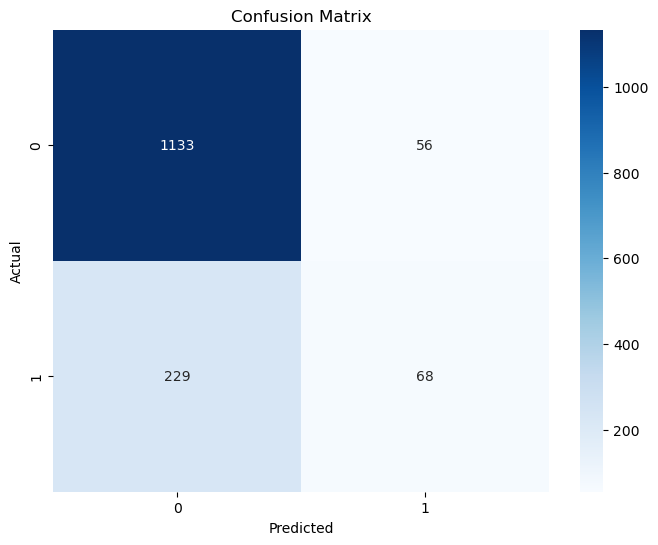

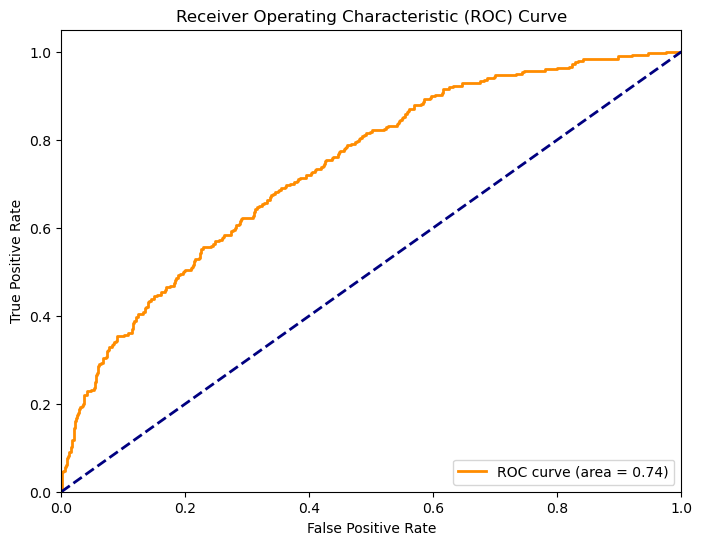

In [48]:
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), solver="adam")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

scaler = StandardScaler()
model = MLPClassifier(max_iter=1000)

pipeline = Pipeline([("scaler", scaler), ("model", model)])

In [71]:
smote = SMOTENC(categorical_features=[7, 8, 9])


X_resampled, y_resampled = smote.fit_resample(X, y)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [75]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score


def objective(trial):
    # Define the hyperparameters to tune
    hidden_layer_sizes = trial.suggest_categorical(
        "hidden_layer_sizes", [(50,), (100,), (100, 50), (100, 100)]
    )
    activation = trial.suggest_categorical(
        "activation", ["identity", "logistic", "tanh", "relu"]
    )
    solver = trial.suggest_categorical(
        "solver", ["sgd", "adam"]
    )  # Excluding lbfgs due to learning_rate
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical(
        "learning_rate", ["constant", "invscaling", "adaptive"]
    )
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-2)

    # Create the model with the suggested hyperparameters
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        max_iter=1000,
        random_state=42,
    )

    scaler = StandardScaler()

    pipeline = Pipeline([("scaler", scaler), ("model", model)])

    # Define the balanced accuracy scorer for cross-validation
    scoring = make_scorer(f1_score, pos_label=1)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(
        pipeline, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1
    )

    # Return the mean balanced accuracy across the 5 folds
    return cv_scores.mean()

In [76]:
import warnings

warnings.filterwarnings("ignore")

In [78]:
# Create a study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2024-09-27 00:31:25,712] A new study created in memory with name: no-name-6918060b-a818-433d-b030-344e31fa87db
[I 2024-09-27 00:31:38,996] Trial 0 finished with value: 0.7356650460047919 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 2.9286661300068945e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 2.9241986083905858e-05}. Best is trial 0 with value: 0.7356650460047919.
[I 2024-09-27 00:32:01,642] Trial 1 finished with value: 0.805479209626788 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 3.896325682608879e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001415993822822318}. Best is trial 1 with value: 0.805479209626788.
[I 2024-09-27 00:32:09,670] Trial 2 finished with value: 0.7478482713611635 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.017349778446458807, 'learning_rate': 'constant', 'learning_rate_init

Best hyperparameters:  {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 2.518049884094332e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0065241889506983675}


Balanced accuracy:  0.796888141295206
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1189
           1       0.80      0.80      0.80      1189

    accuracy                           0.80      2378
   macro avg       0.80      0.80      0.80      2378
weighted avg       0.80      0.80      0.80      2378

ROC AUC:  0.8688277248481135


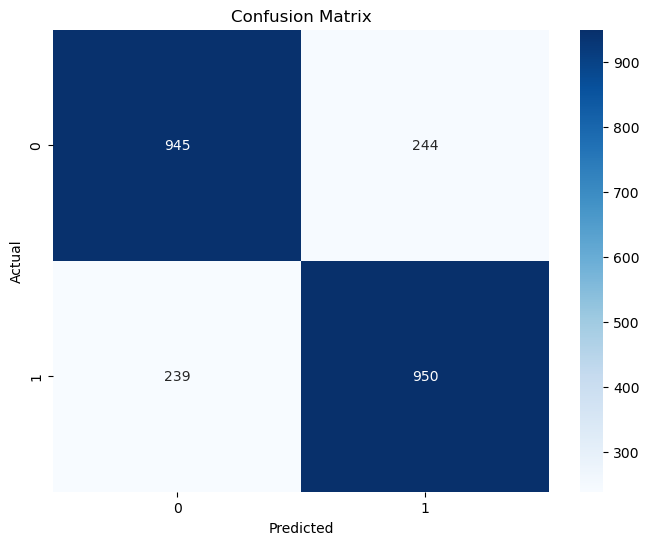

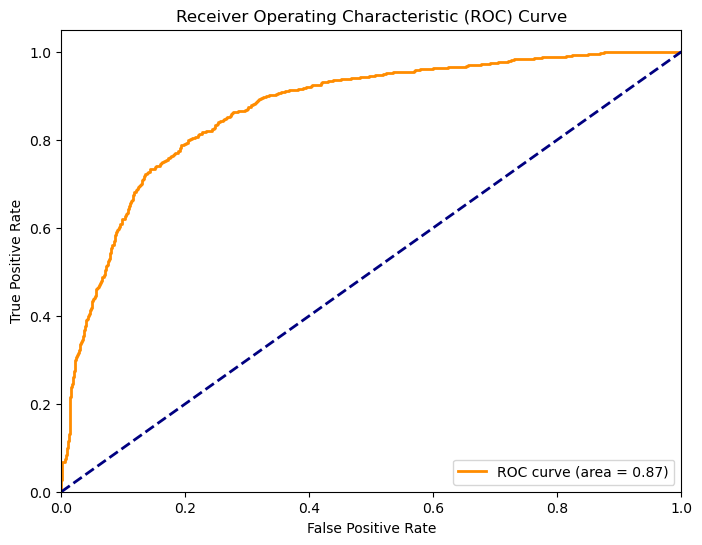

In [79]:
best_params = study.best_params

model = MLPClassifier(
    hidden_layer_sizes=best_params["hidden_layer_sizes"],
    activation=best_params["activation"],
    solver=best_params["solver"],
    alpha=best_params["alpha"],
    learning_rate=best_params["learning_rate"],
    learning_rate_init=best_params["learning_rate_init"],
    max_iter=1000,
    random_state=42,
)

scaler = StandardScaler()

pipeline = Pipeline([("scaler", scaler), ("model", model)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Balanced accuracy:  0.8669509788096836
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5945
           1       0.73      0.81      0.77      1485

    accuracy                           0.90      7430
   macro avg       0.84      0.87      0.85      7430
weighted avg       0.91      0.90      0.90      7430

ROC AUC:  0.9346172688477146


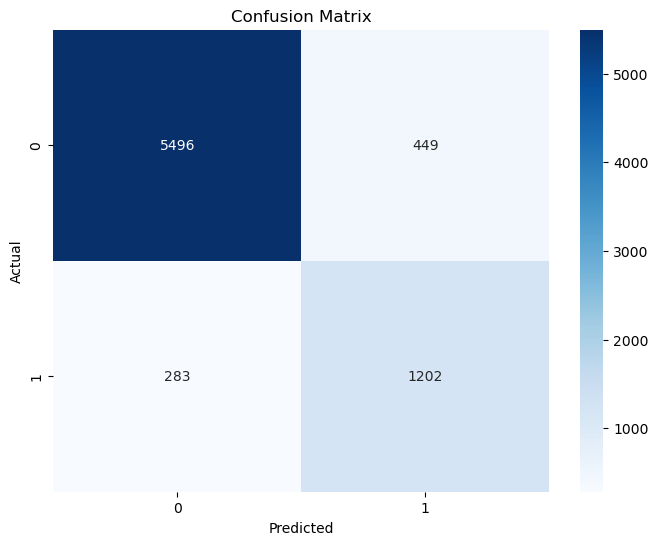

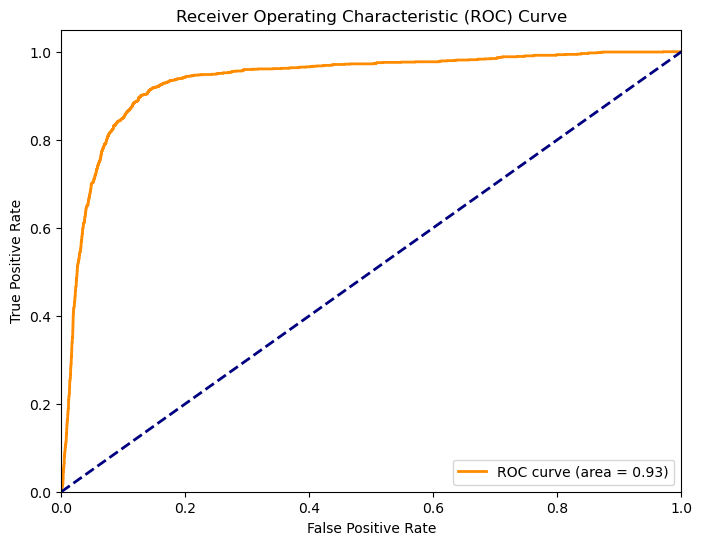

In [87]:
y_pred = pipeline.predict(X)

print("Balanced accuracy: ", balanced_accuracy_score(y, y_pred))

print(classification_report(y, y_pred))

y_pred_proba = pipeline.predict_proba(X)[:, 1]

print("ROC AUC: ", roc_auc_score(y, y_pred_proba))

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()

fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [81]:
df_2 = df.copy()

df_2["Pred_default (y_hat)"] = pipeline.predict(X)

df_2["PD"] = pipeline.predict_proba(X)[:, 1]


In [82]:
df_2

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Monthly payment to income ratio,Loan to car price ratio,Job tenure * Age,Job tenure * Monthly payment,Age * Monthly payment,Default (y),Pred_default (y_hat),PD,Group
0,34,55,4875,3087,0,36,0.047895,0,1,1,0.000016,0.633231,1870,1.628421,2.634211,0,0,1.049082e-09,1
1,5,29,13000,13000,0,60,0.091667,0,0,0,0.000007,1.000000,145,0.458333,2.658333,1,1,7.000407e-01,0
2,14,38,17190,14190,0,60,0.088235,0,0,0,0.000006,0.825480,532,1.235294,3.352941,0,0,5.284206e-02,0
3,16,37,22773,23568,0,48,0.110084,0,1,1,0.000005,1.034910,592,1.761350,4.073122,0,0,6.506727e-07,1
4,1,61,7700,8526,0,48,0.123404,0,1,0,0.000014,1.107273,61,0.123404,7.527660,1,0,1.365055e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,9,38,4502,4856,0,48,0.083846,1,0,0,0.000017,1.078632,342,0.754615,3.186154,1,1,9.890595e-01,0
7426,1,33,22900,17900,0,60,0.098000,0,0,0,0.000005,0.781659,33,0.098000,3.234000,0,0,4.113501e-03,0
7427,3,27,25858,25972,0,24,0.181667,0,0,0,0.000007,1.004409,81,0.545000,4.905000,0,0,1.200342e-02,0
7428,6,32,12300,11300,0,72,0.091963,0,0,1,0.000008,0.918699,192,0.551777,2.942813,0,0,2.188012e-01,0


In [83]:
df_2.to_csv("../Data/black_box_3_data.csv", index=False)

In [84]:
import joblib


joblib.dump(pipeline, "../Models/MLP_model.pkl")


['../Models/MLP_model.pkl']

In [86]:
pipeline_scaler = pipeline.named_steps["scaler"]

joblib.dump(pipeline_scaler, "../Models/MLP_scaler_only.pkl")

pipeline_model = pipeline.named_steps["model"]

joblib.dump(pipeline_model, "../Models/MLP_model_only.pkl")

['../Models/MLP_model_only.pkl']

In [90]:
X_scaled = pipeline_scaler.transform(X)

y_pred = pipeline_model.predict(X_scaled)

y_pred_proba = pipeline_model.predict_proba(X_scaled)[:, 1]

Balanced accuracy:  0.8099243061396131
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1189
           1       0.82      0.79      0.81      1189

    accuracy                           0.81      2378
   macro avg       0.81      0.81      0.81      2378
weighted avg       0.81      0.81      0.81      2378

ROC AUC:  0.8879856775134556


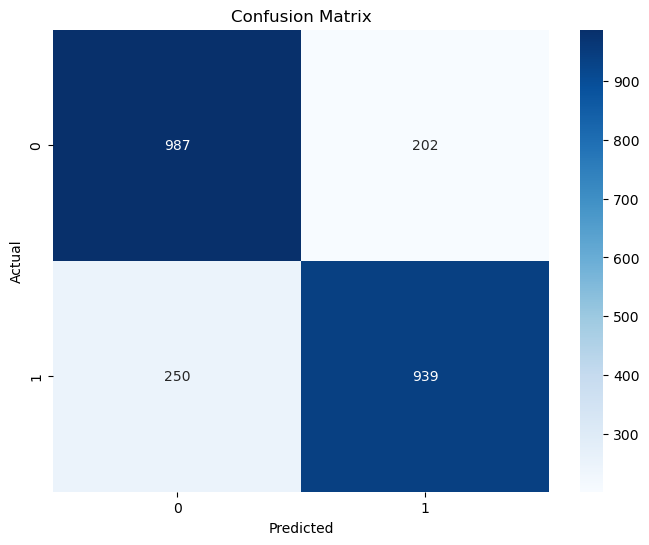

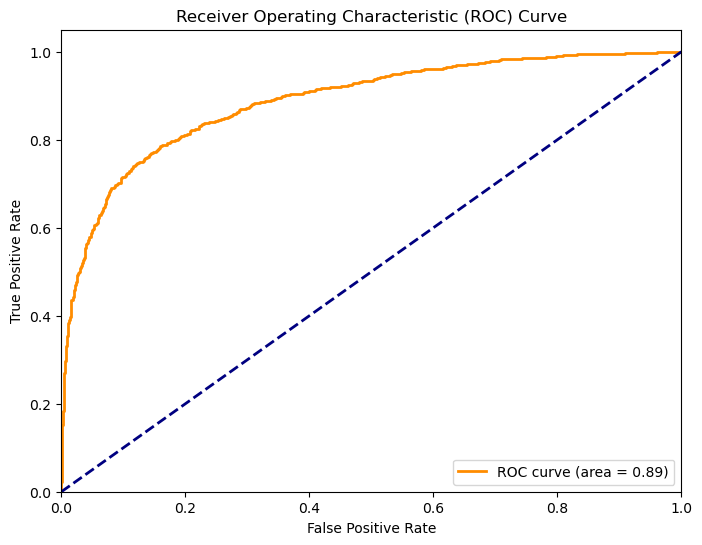

In [70]:
# Retrieve the best hyperparameters
best_params = study.best_params

# Create the model with the best hyperparameters
best_model = MLPClassifier(
    hidden_layer_sizes=best_params["hidden_layer_sizes"],
    activation=best_params["activation"],
    solver=best_params["solver"],
    alpha=best_params["alpha"],
    learning_rate=best_params["learning_rate"],
    learning_rate_init=best_params["learning_rate_init"],
    max_iter=1000,
    random_state=42,
)

# Train the model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Predict probabilities
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# ROC AUC score
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba_best))

# Confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_best,
    tpr_best,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_best,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [73]:
import numpy as np

In [79]:
# Find the best threshold
thresholds = np.arange(0.0, 1.0, 0.01)
balanced_accuracies = []

for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba_original >= threshold).astype(int)
    balanced_acc = f1_score(y, y_pred_adjusted, average="weighted")
    balanced_accuracies.append(balanced_acc)

best_threshold = thresholds[np.argmax(balanced_accuracies)]
print("Best threshold: ", best_threshold)
print("Best balanced accuracy: ", max(balanced_accuracies))


Best threshold:  0.97
Best balanced accuracy:  0.8061764976749802


Balanced accuracy:  0.673439752161367
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5945
           1       0.54      0.44      0.49      1485

    accuracy                           0.81      7430
   macro avg       0.70      0.67      0.69      7430
weighted avg       0.80      0.81      0.81      7430

ROC AUC:  0.8233609433273017


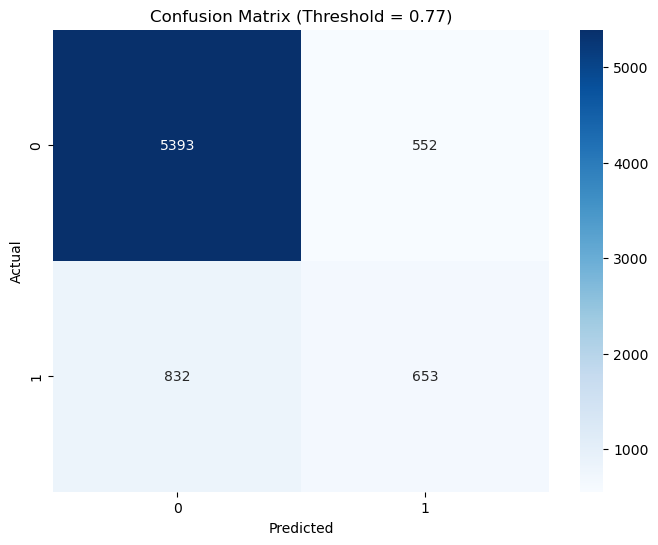

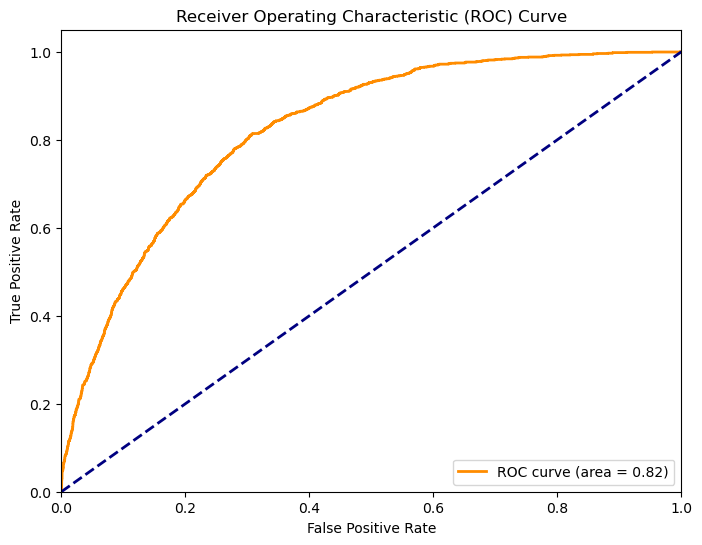

In [81]:
# Predict probabilities
y_pred_proba_original = model.predict_proba(X_scaled)[:, 1]

# Apply threshold of 0.77
threshold = 0.77
y_pred_threshold = (y_pred_proba_original >= threshold).astype(int)

# Evaluate the model with the new threshold
print("Balanced accuracy: ", balanced_accuracy_score(y, y_pred_threshold))
print(classification_report(y, y_pred_threshold))

# ROC AUC score (this doesn't change, still based on probabilities)
print("ROC AUC: ", roc_auc_score(y, y_pred_proba_original))

# Confusion matrix with the new threshold
conf_matrix_original = confusion_matrix(y, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Threshold = 0.77)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (remains based on probabilities, not the new threshold)
fpr_original, tpr_original, _ = roc_curve(y, y_pred_proba_original)
roc_auc_original = auc(fpr_original, tpr_original)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_original,
    tpr_original,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_original,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## LightGBM

[LightGBM] [Info] Number of positive: 1188, number of negative: 4756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 5944, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199865 -> initscore=-1.387136
[LightGBM] [Info] Start training from score -1.387136
Balanced accuracy:  0.6060846763117579
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1189
           1       0.54      0.27      0.36       297

    accuracy                           0.81      1486
   macro avg       0.69      0.61      0.62      1486
weighted avg       0.78      0.81      0.78      1486

ROC AUC:  0.7785140442835986


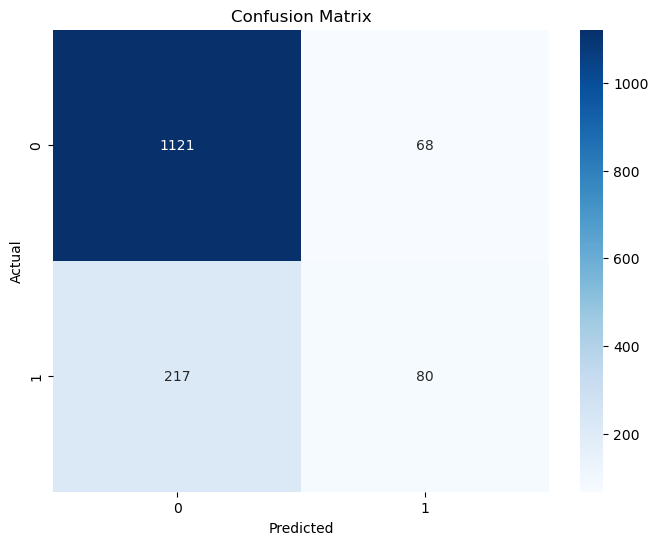

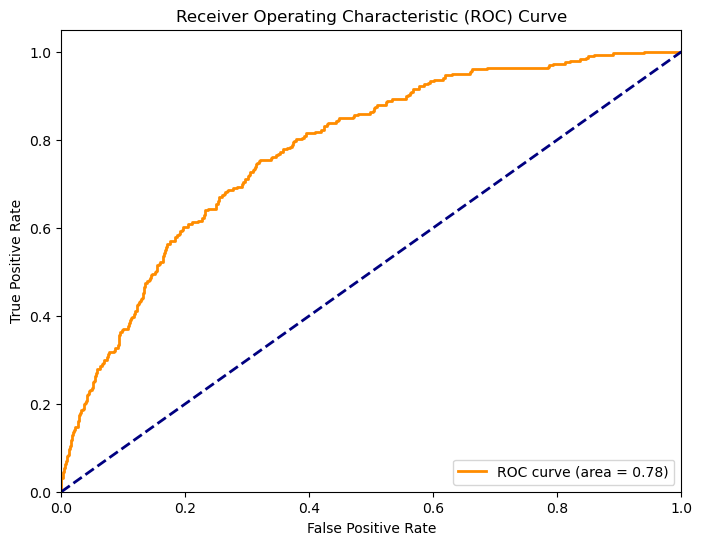

In [32]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.show()

In [33]:
## CatBoost

Learning rate set to 0.022053
0:	learn: 0.6795232	total: 146ms	remaining: 2m 25s
1:	learn: 0.6669733	total: 149ms	remaining: 1m 14s
2:	learn: 0.6548758	total: 152ms	remaining: 50.7s
3:	learn: 0.6438482	total: 156ms	remaining: 38.8s
4:	learn: 0.6343394	total: 159ms	remaining: 31.6s
5:	learn: 0.6232320	total: 162ms	remaining: 26.8s
6:	learn: 0.6134650	total: 165ms	remaining: 23.4s
7:	learn: 0.6044341	total: 167ms	remaining: 20.8s
8:	learn: 0.5956192	total: 170ms	remaining: 18.7s
9:	learn: 0.5880670	total: 172ms	remaining: 17.1s
10:	learn: 0.5801525	total: 175ms	remaining: 15.7s
11:	learn: 0.5724346	total: 177ms	remaining: 14.6s
12:	learn: 0.5648158	total: 179ms	remaining: 13.6s
13:	learn: 0.5576325	total: 182ms	remaining: 12.8s
14:	learn: 0.5507840	total: 184ms	remaining: 12.1s
15:	learn: 0.5447142	total: 187ms	remaining: 11.5s
16:	learn: 0.5385288	total: 190ms	remaining: 11s
17:	learn: 0.5337554	total: 192ms	remaining: 10.5s
18:	learn: 0.5285182	total: 195ms	remaining: 10.1s
19:	learn: 

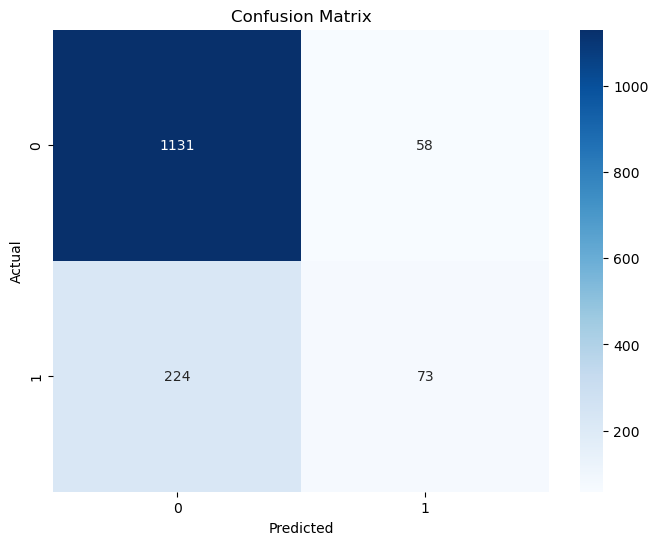

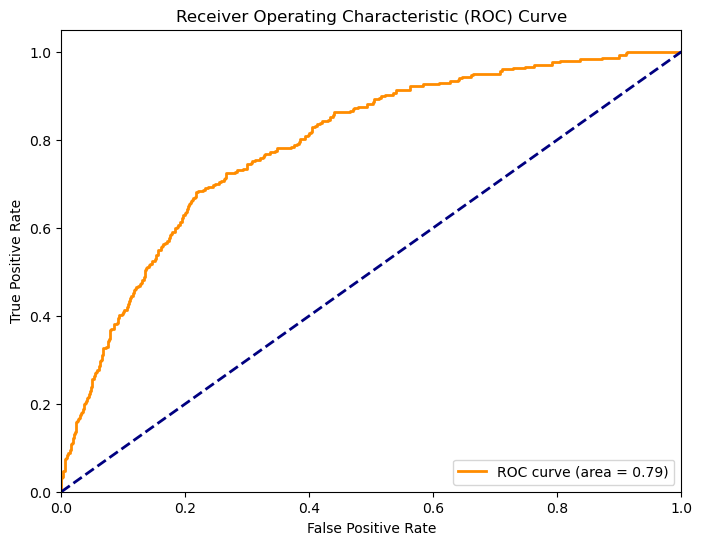

In [34]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.show()

## Voting Classifier

[LightGBM] [Info] Number of positive: 1188, number of negative: 4756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 5944, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199865 -> initscore=-1.387136
[LightGBM] [Info] Start training from score -1.387136
Learning rate set to 0.022053
0:	learn: 0.6795232	total: 3.5ms	remaining: 3.49s
1:	learn: 0.6669733	total: 6.18ms	remaining: 3.08s
2:	learn: 0.6548758	total: 8.66ms	remaining: 2.88s
3:	learn: 0.6438482	total: 11.2ms	remaining: 2.79s
4:	learn: 0.6343394	total: 13.9ms	remaining: 2.77s
5:	learn: 0.6232320	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6134650	total: 19.1ms	remaining: 2.71s
7:	learn: 0.6044341	total: 22ms	remaining: 2.72s
8:	learn: 0.5956192	total: 24.6ms	remaining: 2.71s
9:	learn: 0.5880670	tot

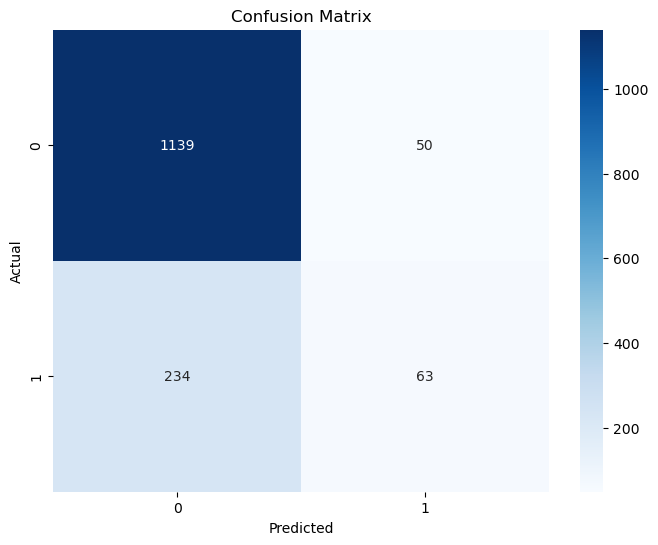

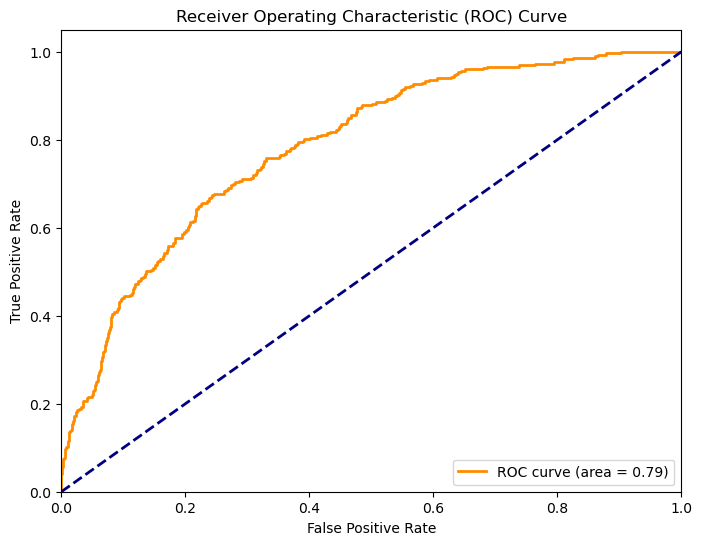

In [35]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
model5 = SVC(probability=True)
model6 = xgb.XGBClassifier()
model7 = MLPClassifier(max_iter=1000)
model8 = LGBMClassifier()
model9 = CatBoostClassifier()


model = VotingClassifier(
    estimators=[
        ("lr", model1),
        ("dt", model2),
        ("rf", model3),
        ("gb", model4),
        ("svc", model5),
        ("xgb", model6),
        ("mlp", model7),
        ("lgbm", model8),
        ("catboost", model9),
    ],
    voting="soft",
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Stacking Classifier

[LightGBM] [Info] Number of positive: 1188, number of negative: 4756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 5944, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199865 -> initscore=-1.387136
[LightGBM] [Info] Start training from score -1.387136
Learning rate set to 0.022053
0:	learn: 0.6795232	total: 3.04ms	remaining: 3.04s
1:	learn: 0.6669733	total: 5.56ms	remaining: 2.77s
2:	learn: 0.6548758	total: 8.34ms	remaining: 2.77s
3:	learn: 0.6438482	total: 10.7ms	remaining: 2.67s
4:	learn: 0.6343394	total: 13.3ms	remaining: 2.65s
5:	learn: 0.6232320	total: 16ms	remaining: 2.66s
6:	learn: 0.6134650	total: 18.6ms	remaining: 2.64s
7:	learn: 0.6044341	total: 21.7ms	remaining: 2.69s
8:	learn: 0.5956192	total: 24.9ms	remaining: 2.74s
9:	learn: 0.5880670	to

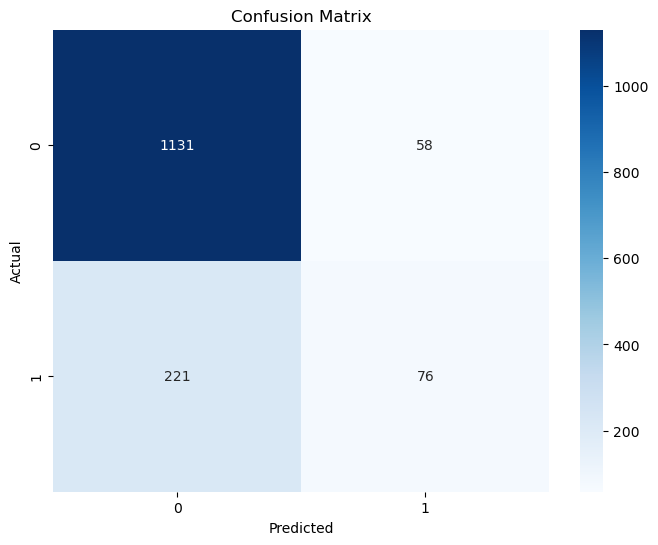

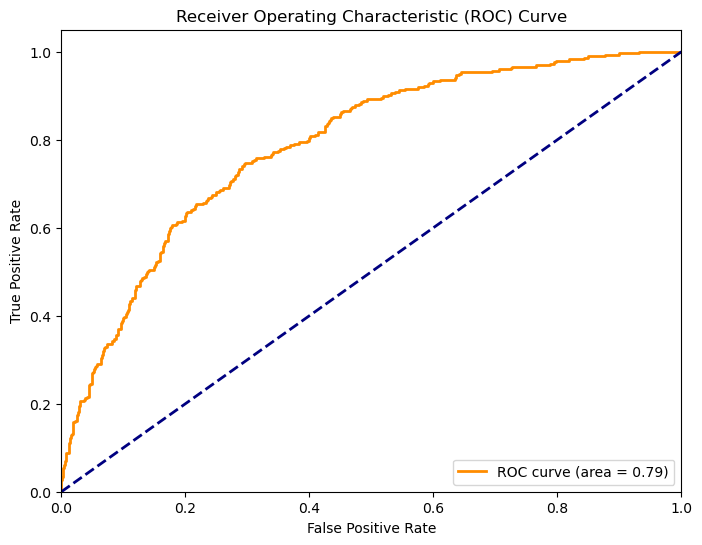

In [38]:
from sklearn.ensemble import StackingClassifier

# model1 = LogisticRegression(max_iter=1000)
# model2 = DecisionTreeClassifier()
# model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
# model5 = SVC(probability=True)
model6 = xgb.XGBClassifier()
model7 = MLPClassifier(max_iter=1000)
model8 = LGBMClassifier()
model9 = CatBoostClassifier()

model = StackingClassifier(
    estimators=[
        # ("lr", model1),
        # ("dt", model2),
        # ("rf", model3),
        ("gb", model4),
        # ("svc", model5),
        ("xgb", model6),
        ("mlp", model7),
        ("lgbm", model8),
        ("catboost", model9),
    ],
    final_estimator=LogisticRegression(),
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## model selection